In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
import seaborn as sns

In [21]:
#データ読み込み
df_ks = pd.read_csv("ks-projects-201801.csv")[['country','goal','pledged','state','backers']]
df_ks['state'] = df_ks['state'] == 'successful'

#質量変数をダミー変数に変換
df_ks = pd.get_dummies(df_ks)

display(df_ks)
df_ks.describe()

,goal,pledged,state,backers,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0.00,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,2421.00,False,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,220.00,False,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,1.00,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,19500.0,1283.00,False,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,52375.00,True,224,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1000.0,1205.00,True,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,25000.0,453.00,False,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,125000.0,8233.00,False,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,65000.0,6240.57,False,43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


,goal,pledged,backers,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
count,3.786610e+05,3.786610e+05,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,...,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.00000,378661.000000,378661.00000,378661.000000,378661.000000
mean,4.908079e+04,9.682979e+03,105.617476,0.001577,0.020702,0.001629,0.038969,0.002010,0.011015,0.002939,...,0.000106,0.000164,0.004627,0.010027,0.007574,0.00187,0.003821,0.00464,0.001466,0.772794
std,1.183391e+06,9.563601e+04,907.185035,0.039675,0.142385,0.040333,0.193521,0.044785,0.104373,0.054136,...,0.010277,0.012795,0.067863,0.099634,0.086699,0.04320,0.061699,0.06796,0.038256,0.419027
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,2.000000e+03,3.000000e+01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
50%,5.200000e+03,6.200000e+02,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
75%,1.600000e+04,4.076000e+03,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
max,1.000000e+08,2.033899e+07,219382.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000


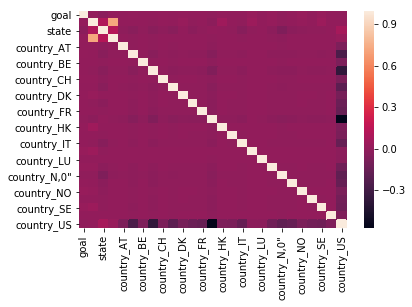

In [22]:
df_ks.corr()
sns.heatmap(df_ks.corr())
plt.show()

In [23]:
y = df_ks["state"].values
X = df_ks.drop('state', axis=1).values

#欠損値を0に変換
X[np.isnan(X)] = 0

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}'.format(w0, w1, w2))

w0 = 591.560, w1 = -383.279, w2 = 388.756


In [24]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -0.333
正答率 = 99.035%


In [25]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 成功', '正解 = 失敗orキャンセル'], 
                        columns=['予測 = 成功', '予測 = 失敗orキャンセル'])
conf_mat

,予測 = 成功,予測 = 失敗orキャンセル
正解 = 成功,241052,3653
正解 = 失敗orキャンセル,1,133955


In [26]:
# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

適合率（Precision） = 100.000%
再現率（Recall） = 98.507%
F1値（F1-score） = 99.248%
